In [2]:
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from RadarCameraYOLO import RadarCameraYoloDataset, RadarCameraYOLO

model = RadarCameraYOLO(num_classes=7)

Running on CPU mode only
*************Training started!


target_bboxes_map: tensor([0.5461, 0.3106, 0.3609, 0.3417])
target_bboxes_map: tensor([0.7758, 0.4157, 0.4474, 0.0722])
target_bboxes_map: tensor([0.8646, 0.4241, 0.2698, 0.0685])
target_bboxes_map: tensor([0.8435, 0.2926, 0.3120, 0.3130])
target_bboxes_map: tensor([0.4104, 0.5500, 0.1854, 0.1407])
target_bboxes_map: tensor([0.4951, 0.5028, 0.0151, 0.0500])
target_bboxes_map: tensor([0.4784, 0.4986, 0.0224, 0.0972])
target_bboxes_map: tensor([0.4432, 0.4630, 0.0188, 0.0278])
target_bboxes_map: tensor([0.4271, 0.5009, 0.0417, 0.1333])


/opt/conda/envs/rcfd/lib/python3.7/site-packages/torch/autograd/__init__.py:132: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  allow_unreachable=True)  # allow_unreachable flag


Epoch [1/5], Step [0/18], Class Loss: 1.9196, BBox Loss: 0.3559, Objectness Loss: 0.9615, Total Loss: 3.2370
target_bboxes_map: tensor([0.6135, 0.4759, 0.1823, 0.1407])
target_bboxes_map: tensor([0.3948, 0.4116, 0.1125, 0.0639])
target_bboxes_map: tensor([0.6745, 0.4130, 0.0604, 0.1648])
target_bboxes_map: tensor([0.5260, 0.5023, 0.4448, 0.2139])
target_bboxes_map: tensor([0.7701, 0.4153, 0.0661, 0.0602])
target_bboxes_map: tensor([0.6516, 0.4213, 0.1229, 0.0778])
target_bboxes_map: tensor([0.5651, 0.4306, 0.1354, 0.0593])
target_bboxes_map: tensor([0.4227, 0.4157, 0.2130, 0.0870])
target_bboxes_map: tensor([0.6854, 0.3685, 0.0250, 0.0926])
target_bboxes_map: tensor([0.6661, 0.3667, 0.0177, 0.0833])
target_bboxes_map: tensor([0.7422, 0.3727, 0.0344, 0.0676])
target_bboxes_map: tensor([0.7482, 0.3361, 0.0193, 0.0296])
target_bboxes_map: tensor([0.8961, 0.5269, 0.0995, 0.1685])
target_bboxes_map: tensor([0.6578, 0.4958, 0.0500, 0.0843])
target_bboxes_map: tensor([0.5419, 0.3977, 0.0630, 

In [3]:
model.load_state_dict(torch.load("./trained_model.pth"))
model.eval()

RadarCameraYOLO(
  (camera_stem): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): SiLU()
    (3): CSPBlock(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (conv2): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bottlenecks): Sequential(
        (0): Sequential(
          (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): SiLU()
        )
        (1): Sequential(
          (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): SiLU()
        )
        (2): Sequential(
          (0): Conv2d(64, 64, kernel_size=(3, 3), stri

In [4]:
from WaterScenes.radar_map_generate import RESOLUTION

# ✅ Load dataset
data_root = "/workspaces/Radar-Camera-Fusion-Detection/WaterScenes/sample_dataset"  # data path
input_shape = (RESOLUTION, RESOLUTION)

dataset = RadarCameraYoloDataset(data_root=data_root, input_shape=input_shape)

In [5]:
from torchvision import ops
import matplotlib.pyplot as plt
import numpy as np
import torch
import cv2

# YOLO style color
def color_list():
    hex = (
        '7FFF00',  # yellow green,
        '808080',  # grey  
        'FF4C4C',  # red      
        '32CD32',  # green  
        '1E90FF',  # blue 
        '9370DB',  # purple  
        'FF69B4',  # pink  
    )


    return [tuple(int(h[i:i + 2], 16) for i in (0, 2, 4)) for h in hex]

COLORS = color_list()

# YOLO style bbox drawing
def plot_one_box(x, img, color=None, label=None, line_thickness=None):
    # copy
    img_copy = img.copy()

    # thickness adjusted by image size
    tl = max(1, int(min(img_copy.shape[:2]) / 400))
    
    # set color
    color = color or COLORS[int(label) % len(COLORS)]
    color = tuple(map(int, color))


    # RGB → BGR
    if img_copy.shape[-1] == 3:
        img_copy = cv2.cvtColor(img_copy, cv2.COLOR_RGB2BGR)

    # coord
    x1, y1, x2, y2 = map(int, x)
    # draw bbox
    cv2.rectangle(img_copy, (x1, y1), (x2, y2), color, thickness=tl, lineType=cv2.LINE_AA)

    if label:
        # font size
        tf = max(tl - 1, 1)  # font thickness
        font_scale = tl / 5
        t_size = cv2.getTextSize(label, 0, fontScale=font_scale, thickness=tf)[0]
        c2 = x1 + t_size[0], y1 - t_size[1] - 3
        cv2.rectangle(img_copy, (x1, y1), c2, color, -1, cv2.LINE_AA)  # Filled background

        # add text
        cv2.putText(img_copy, label, (x1, y1 - 2), 0, font_scale, (255, 255, 255), thickness=tf, lineType=cv2.LINE_AA)

    return cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB) 


# xywh → xyxy
def xywh2xyxy(x):
    y = x.clone() if isinstance(x, torch.Tensor) else np.copy(x)
    y[:, 0] = x[:, 0] - x[:, 2] / 2  # top left x
    y[:, 1] = x[:, 1] - x[:, 3] / 2  # top left y
    y[:, 2] = x[:, 0] + x[:, 2] / 2  # bottom right x
    y[:, 3] = x[:, 1] + x[:, 3] / 2  # bottom right y
    return y


In [13]:
# Visualization
MEAN = [0.485, 0.456, 0.406]
STD = [0.229, 0.224, 0.225]
def visualize_predictions(model, dataset, num_samples=5, confidence_threshold=0.5, iou_threshold=0.4):
    model.eval()
    
    for i in range(num_samples):
        # ========= Tensor → numpy =========
        image, radar, labels = dataset[i]
        if isinstance(image, torch.Tensor):
            image_np = image.permute(1,2,0).cpu().numpy() # image_np: (3, 160, 160)
            image_np = (image_np * np.array(STD, dtype=np.float32)) + np.array(MEAN, dtype=np.float32)
            image_np = (image_np * 255).astype(np.uint8)  # float → uint8
        else:
            image_np = image.copy()

        if image_np.shape[-1] == 3:
            image_np = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)
        #print(f"image_np: {image_np.shape}")
 
        # ========= Prediction =========
        with torch.no_grad():
            class_output, bbox_output, obj_output = model(image.unsqueeze(0), radar.unsqueeze(0))

        class_prob = torch.softmax(class_output, dim=1)
        confidence, pred_classes = torch.max(class_prob, dim=1)
        if isinstance(bbox_output, torch.Tensor):
            pred_boxes = bbox_output.squeeze(0).cpu().numpy().reshape(-1, 4)

            objectness = obj_output.squeeze(0).cpu().numpy().flatten()
            conf_scores = (confidence.squeeze(0).cpu().numpy().flatten()) * objectness
            pred_classes = pred_classes.squeeze(0).cpu().numpy().flatten()
            
        else:
            pred_boxes = bbox_output.reshape(-1, 4)
            conf_scores = confidence.flatten() * obj_output.flatten()
            pred_classes = pred_classes.flatten()

        # ========= NMS =========
        if len(pred_boxes) > 0:
            pred_boxes_tensor = torch.tensor(pred_boxes, dtype=torch.float32)
            conf_scores_tensor = torch.tensor(conf_scores, dtype=torch.float32)
            nms_indices = ops.nms(pred_boxes_tensor, conf_scores_tensor, iou_threshold)

            pred_boxes = xywh2xyxy(pred_boxes_tensor[nms_indices]).numpy()
            pred_boxes = pred_boxes_tensor[nms_indices].numpy()
            #print(f"pred_boxes: {pred_boxes}")
            conf_scores = conf_scores_tensor[nms_indices]
            pred_classes = pred_classes[nms_indices]

        # ========= Ground Truth =========
        gt_img = image_np.copy()
        pred_img = image_np.copy()
        
        if labels.size(0) > 0:
            gt_boxes = xywh2xyxy(labels[:, 1:5])
            for j, box in enumerate(gt_boxes):
                box = box.numpy()
                #print(f"box: {box}")
                class_id = int(labels[j][0])
                label = f"GT: {class_id}"
                gt_box = box * [image_np.shape[1], image_np.shape[0], image_np.shape[1], image_np.shape[0]]
                gt_img = plot_one_box(gt_box, gt_img, color=COLORS[int(class_id % len(COLORS))], label=label)

        if len(pred_boxes) > 0:
            for j in range(pred_boxes.shape[0]):
                if conf_scores[j] > confidence_threshold:
                    #print(f"pred_boxes[j]:{pred_boxes[j]}")
                    pred_box = pred_boxes[j] * np.array([image_np.shape[1], image_np.shape[0], image_np.shape[1], image_np.shape[0]])
                    print(f"pred_box: {pred_box}")
                    label = f"Pred: {class_id} ({conf_scores[j]:.2f})"
                    pred_img = plot_one_box(pred_box, pred_img, color=COLORS[class_id % len(COLORS)], label=label)

        # ========= Visualization =========
        fig, axs = plt.subplots(1, 2, figsize=(6, 3))

        # GT Plot
        gt_img = cv2.cvtColor(gt_img, cv2.COLOR_BGR2RGB) 
        axs[0].imshow(gt_img)
        axs[0].set_title("Ground Truth")
        axs[0].axis('off')

        # Prediction Plot
        pred_img = cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB) 
        axs[1].imshow(pred_img)
        axs[1].set_title("Prediction")
        axs[1].axis('off')

        plt.tight_layout()
        plt.show()

pred_box: [17.33910203 17.41439462 17.65751123 17.58762598]
pred_box: [18.89059305 18.2733345  21.83800697 11.46792293]
pred_box: [ 3.69395673  4.02472436  8.03872705 14.70255494]
pred_box: [18.3746779  18.87291312 19.08248305 19.00224209]
pred_box: [18.23642135 17.59574533 17.35972524 17.31258154]
pred_box: [20.60704231 21.72015905 22.95968294 23.48287582]
pred_box: [16.96305633 16.27445698 16.13695025 16.58919096]
pred_box: [23.07098627 22.1075201  21.13925457 20.14729261]
pred_box: [22.39807606 19.72540259 16.46992683 14.54002023]
pred_box: [19.33247805 18.86177778 19.34468031 21.9678998 ]
pred_box: [17.19187737 17.06217527 14.29367542 17.84423351]


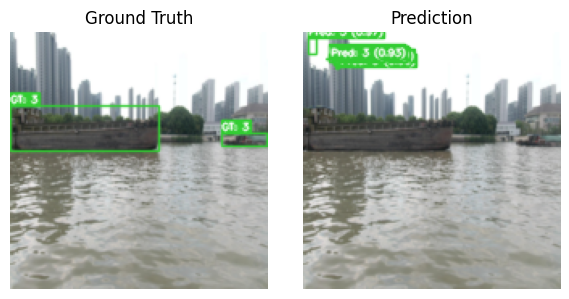

pred_box: [17.79276609 17.84170151 17.86011219 17.87090302]
pred_box: [20.32643557 15.97073793 17.76051879 17.87979126]
pred_box: [21.93673849 21.9041872  21.89061403 21.88531637]
pred_box: [22.03860044 21.9989562  21.95993662 21.95137978]
pred_box: [25.45702934 21.98108435 22.11669445 22.05000639]
pred_box: [0.0843384  0.02735868 0.34138013 7.7054131 ]
pred_box: [19.06696796 19.24389005 19.39650893 19.42316413]
pred_box: [19.08982158 18.9784503  18.94413948 18.9671433 ]
pred_box: [ 0.03910576  0.61919022  3.90339017 16.2310195 ]
pred_box: [19.39544439 16.55179739 17.82674074 18.45561385]
pred_box: [17.85608768 17.96243906 18.1539011  17.49631047]
pred_box: [0.10040591 0.00884309 0.00148778 0.0034555 ]
pred_box: [18.22972417 18.09985161 17.65515924 21.65168047]
pred_box: [17.56622195 17.09759235  9.00678873  1.29599065]
pred_box: [19.36246514 19.25860405 19.19734478 19.2126143 ]
pred_box: [21.86117649 21.85677052 21.86211824 21.87436581]
pred_box: [21.81460619 18.53868008 19.35513616 1

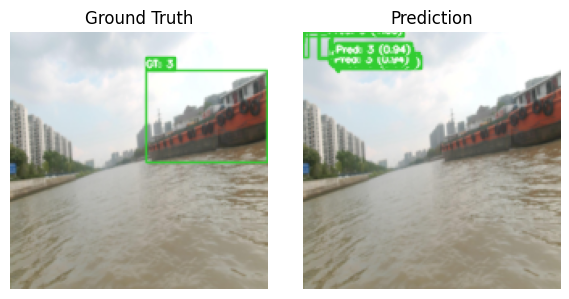

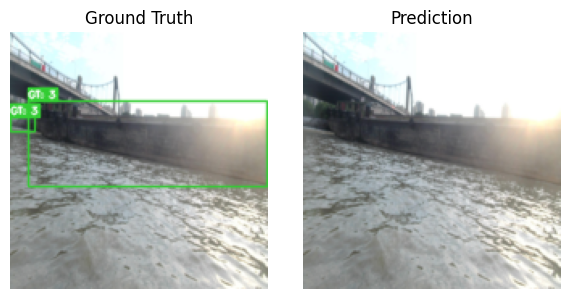

pred_box: [14.58931565 13.92521381 18.28410864 20.62108755]
pred_box: [19.58278537 17.11343288 17.61561155 17.78864622]
pred_box: [ 8.21275473 13.98381233 13.93238664 17.74470329]
pred_box: [17.76064634 17.46857524 16.5246582  15.67576051]
pred_box: [23.30128431 14.52867746  5.10527551  4.71716166]
pred_box: [18.17220569 18.27434182 17.79919624 21.74960613]
pred_box: [18.9469552  15.43432951 17.9307127  18.22514176]
pred_box: [25.01626253 22.49866247 22.40967751 22.3822403 ]
pred_box: [22.46162176 22.56946087 22.59581566 22.56706715]
pred_box: [18.06532264 18.3379674  17.93909907 17.73119926]


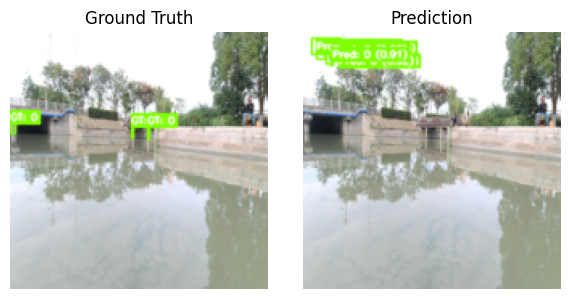

pred_box: [14.90983367 15.50696015 17.07762122 20.05689144]
pred_box: [20.04523277 20.04127979 22.39786625 24.59096193]
pred_box: [19.27369118 15.88707924 17.48312712 19.61357832]
pred_box: [16.46923423 15.9608829  14.73092318 14.23380613]
pred_box: [22.0370841  23.56501818 23.83067608 23.84792328]
pred_box: [19.36063766 17.80597448 17.77655721 17.73552656]
pred_box: [22.96763182 29.24004793 31.67321682 25.83111286]
pred_box: [24.66176271 25.4578805  25.90073586 26.23940229]
pred_box: [19.80540752 19.87058043 20.06274223 20.16390085]
pred_box: [18.68868709 22.16742992 28.00880671 26.56303644]
pred_box: [21.00822687 18.92289877 18.84964824 19.88834858]
pred_box: [20.92566013 21.42993212 21.53879881 21.35743856]
pred_box: [12.16635704  5.85897565  5.09388804  7.69738019]
pred_box: [18.15110803 18.36895347 18.20278883 16.49948239]
pred_box: [26.20812654 26.11174822 26.04794025 25.92429161]
pred_box: [17.42822647 17.53663301 17.70541191 17.65666127]
pred_box: [18.40169907 17.52056122 17.37

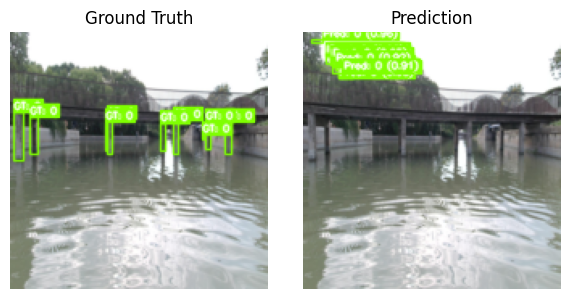

In [14]:
# viz example
visualize_predictions(model, dataset, num_samples=5, confidence_threshold=0.9, iou_threshold=0.9)